# Descenso del Gradiente

En este _notebook_ vamos a aprender a programar el método de Descenso de Gradiente, o _Gradient Descent_, y usarlo para estimar una regresión. Vamos a partir generando datos que se ven lineales. Las gráficas de esta clase son cortesía de Adrián Soto, Director de Transferencia Tecnológica IMFD. 

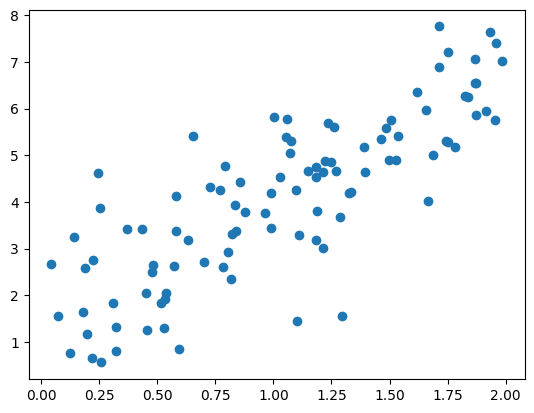

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Queremos un dataset de 100 muestras
X = 2*np.random.rand(100, 1)
y = 1 + 3*X + np.random.randn(100, 1)

plt.scatter(X, y)

Ahora necesitamos generar la matriz `X_b`, que es la matriz de features pero con el 1s en la primera columna, para poder tratar el beta0 de forma algebraica

In [2]:
X_b = np.c_[np.ones((100, 1)), X]

Y ahora graficaremos el MSE en función de $\beta_0$ y $\beta_1$

In [3]:
# Vamos a crear las combinaciones posibles de B
B0 = np.arange(-10, 10, 0.25)
B1 = np.arange(-10, 10, 0.25)

B0, B1 = np.meshgrid(B0, B1)

Z = []
for i in range(B0.shape[0]):
    Z_row = []
    for j in range(B0.shape[1]):
        sum_row = 0
        for k in range(X_b.shape[0]):
            sum_row += (B0[i, j]*X_b[k, 0] + B1[i, j]*X_b[k, 1] - y[k])**2
        sum_row = (1/100) * sum_row
        Z_row.append(float(sum_row))
    Z.append(Z_row)

Z = np.array(Z)

/var/folders/gf/12lsjk9d5mn0gdyhlk_xd0zm0000gn/T/ipykernel_44922/2656421868.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z_row.append(float(sum_row))


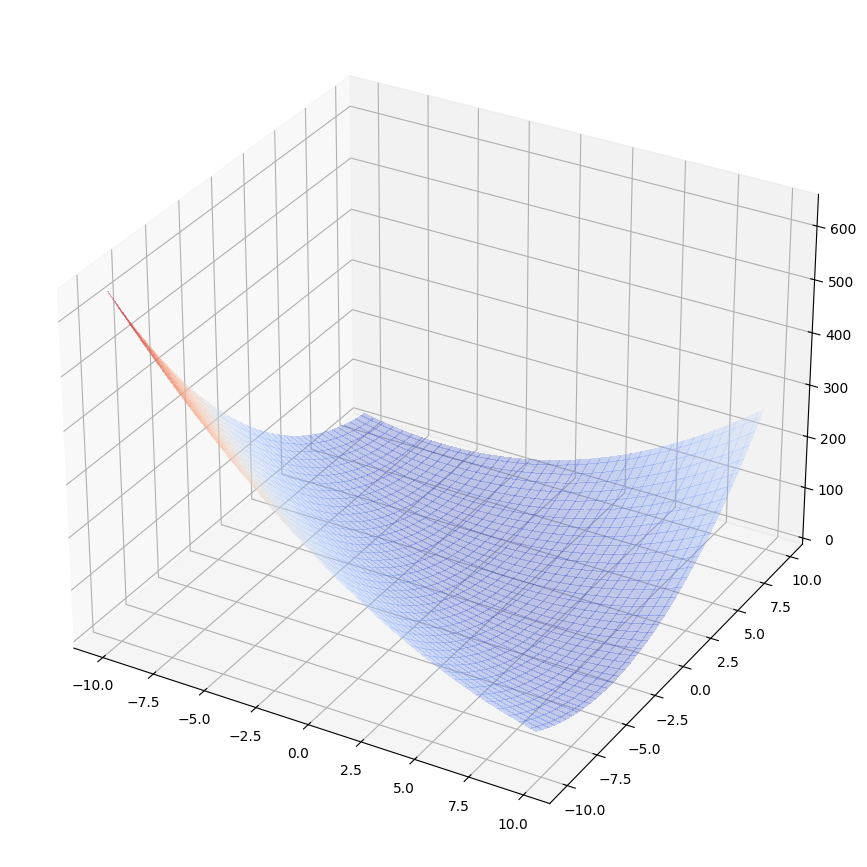

In [7]:
from matplotlib import cm

plt.rcParams['figure.figsize'] = [11, 11]
fig = plt.figure()

sp = plt.subplot(projection='3d')
surf = sp.plot_surface(B0, B1, Z, linewidth=0, antialiased=False, alpha=0.3, cmap=cm.coolwarm)

plt.show()

Ahora vamos a implementar el algoritmo _Gradient Descent_.

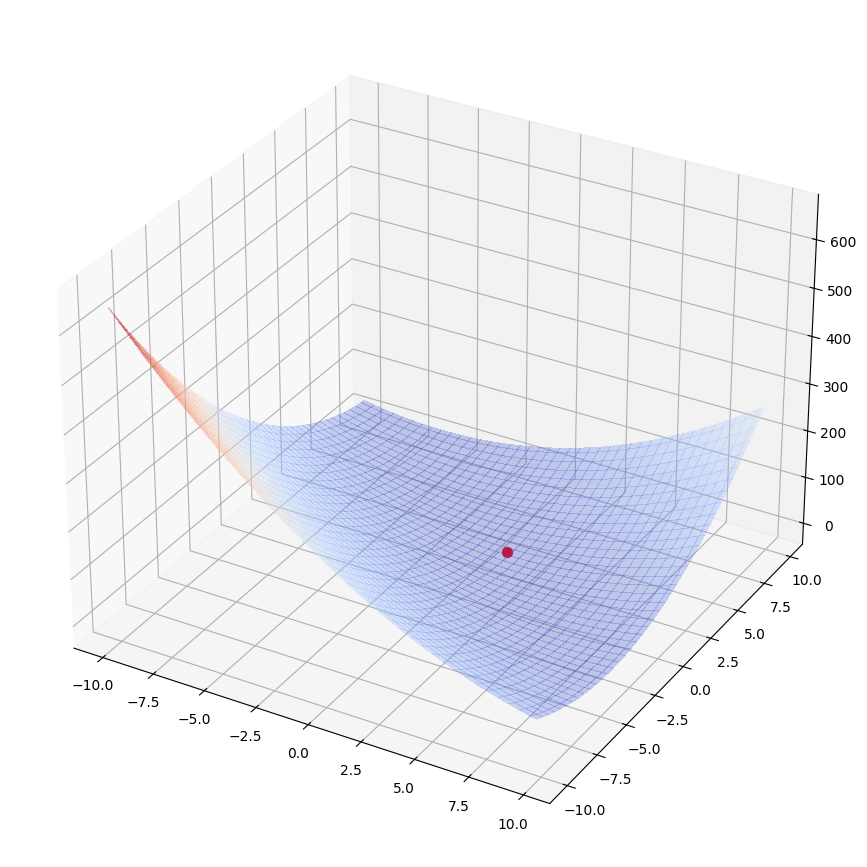

In [8]:
#eta es el learning rate, y paramos luego de 100 iteraciones
eta = 0.1
n_iterations = 100

# Inicializamos valores de Beta random
beta = np.random.randn(2, 1)

# Hacemos n_iterations iteraciones del algoritmo de Gradient Descent
for iteration in range(n_iterations):
    # Esta es la derivada, dado que tenemos 100 muestras
    gradients = 2/100 * X_b.T.dot(X_b.dot(beta) - y)
    # Cambiamos el beta según la tasa de aprendizaje
    beta = beta - eta * gradients

# Iteramos sobre todo el dataset para ver
# cuanto vale nuestra función objetivo
sum_row = 0
for k in range(X_b.shape[0]):
    sum_row += (beta[0]*X_b[k, 0] + beta[1]*X_b[k, 1] - y[k])**2

# Recordemos que al ser 100 muestras dividimos
# por 100 al estar usando el MSE
sum_row = (1/100) * sum_row
    
    
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(beta[0], beta[1], sum_row, zdir='z', color="red", s=50)
surf = ax.plot_surface(B0, B1, Z, linewidth=1, antialiased=False, alpha=0.3, cmap=cm.coolwarm)

plt.show()

Ahora veamos los valores de beta después de estas 100 iteraciones.

In [9]:
beta

array([[1.3126002 ],
       [2.67126124]])

Ahora veamos cómo cambia de iteración en iteración.

In [10]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

eta = 0.1
max_iter = 100

#el punto de partida beta debería ser random, pero para el show partimos lejos
#beta = np.random.randn(2,1)
beta = np.array([-9, -9]).reshape(2,1)

beta_list = [beta]
for iteration in range(max_iter + 1):
    gradients = 2/100 * X_b.T.dot(X_b.dot(beta) - y)
    beta = beta - eta * gradients
    beta_list.append(beta)


def f_widget(n_iterations):
    beta = beta_list[n_iterations]
    sum_row = 0
    for k in range(X_b.shape[0]):
        sum_row += (beta[0]*X_b[k, 0] + beta[1]*X_b[k, 1] - y[k])**2

    sum_row = (1/100) * sum_row
    
    fig = plt.figure()

    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(beta[0], beta[1], sum_row, zdir='z', color="red", s=50)
    surf = ax.plot_surface(B0, B1, Z, linewidth=1, antialiased=False, alpha=0.3, cmap=cm.coolwarm)
    plt.show()

interact(f_widget, n_iterations=widgets.IntSlider(min=0, max=max_iter, step=1, value=0));

interactive(children=(IntSlider(value=0, description='n_iterations'), Output()), _dom_classes=('widget-interac…

Como vemos, los primeros pasos son bastante más grande que los últimos. Sin embargo, este algoritmo siempre escoge moverse, y en las últimas épocas solo atenuamos esto por lo bajo de la _learning rate_.